In [2]:
import sys
import numpy as np
import pandas as pd
sys.path.append('/home/stacyste/Documents/Research/OverloadedSignaling/Simulations')

In [3]:
%load_ext autoreload
%autoreload 2

# Read in and Combine Data

In [62]:
obsNearR = pd.read_pickle('./simulation_recursion_obstacleHNearRec_SQuit_a4_r8_seed987_6ItemFullVocab_300Runs.pkl')
obsNearS = pd.read_pickle('./simulation_recursion_obstacleHNearSig_SQuit_a4_r8_seed2802_6ItemFullVocab_300Runs.pkl')


recB_CommOptimal = obsNearR.loc[obsNearR['CentralControl_actor'] == 'receiver']
sigB_CommOptimal = obsNearS.loc[obsNearS['CentralControl_actor'] == 'receiver']
sigB_CommOptimal = sigB_CommOptimal.drop(297)

In [84]:
sigB_CommOptimal.shape

(180, 82)

In [85]:
recB_CommOptimal.shape

(137, 82)

In [64]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):

    if not ax:
        ax = plt.gca()
        
    #Custom Color mapping
    #colors = [(177, 13, 47), (100, 100, 100), (145, 175, 236)]  # R -> G -> B
    #cm = mpl.colors.LinearSegmentedColormap.from_list('IWred_cmap', colors, N=100)

    # Plot the heatmap
    im = ax.imshow(data, interpolation='nearest', cmap='coolwarm', **kwargs)

    # Create colorbar 
    #im.set_clim(vmin=20,vmax=100)
    im.set_clim(vmin=20,vmax=100)
    cbar = ax.figure.colorbar(im, ax=ax, drawedges = False, **cbar_kw)
    
    #cbar = mpl.colorbar.ColorbarBase(ax, cmap="YlGn", norm=mpl.colors.Normalize(vmin=0, vmax=100))
    
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)


    # Rotate the tick labels and set their alignment.
    #plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
    #         rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)
    
    # Label X and Y axes
    ax.set_xlabel("Receiver")
    ax.set_ylabel("Signaler")

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = mpl.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            #getThreshold = lambda dt: textcolors[int(im.norm(data[i, j]) > threshold)]
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

# Specific Examples to Look at

In [65]:
sigB_CommOptimal.loc[(sigB_CommOptimal['IW_S1R0_rAchievesGoal']==True) & (sigB_CommOptimal['RSA_S2R2_sChoice'] == 'quit')].index

Int64Index([  0,   1,   8,  13,  23,  25,  26,  36,  43,  44,  55,  57,  59,
             75,  77,  81,  84,  86, 109, 129, 158, 163, 166, 184, 189, 204,
            206, 211, 212, 213, 222, 224, 225, 235, 241, 262, 269, 272, 274,
            276, 285, 288],
           dtype='int64')

In [66]:
sys.path.append('/home/stacyste/Documents/Research/OverloadedSignaling/Environments/Experiment/')
from visualizations_Experiment import visualizeExperimentTrial

In [ ]:
#25

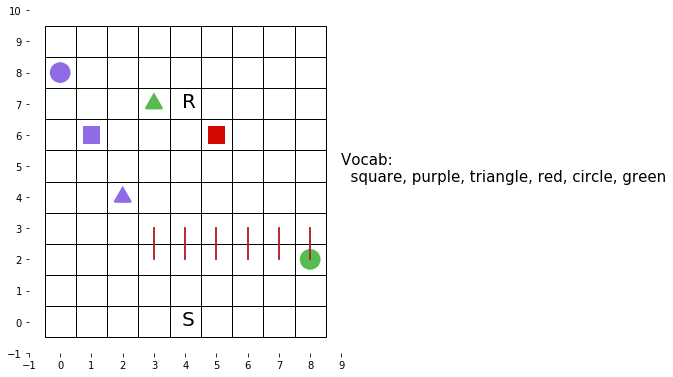

In [40]:
idxToViz = 43
visualizeExperimentTrial((9,10), sigB_CommOptimal.loc[idxToViz]['signalerLocation'], 
                         sigB_CommOptimal.loc[idxToViz]['receiverLocation'], 
                         sigB_CommOptimal.loc[idxToViz]['signalSpace'],
                         sigB_CommOptimal.loc[idxToViz]['targetDictionary'], 
                         barriers = [((3, 2), (0, 1)),
                                     ((4, 2), (0, 1)),
                                     ((5, 2), (0, 1)),
                                     ((6, 2), (0, 1)),
                                     ((7, 2), (0, 1)),
                                     ((8, 2), (0, 1)),
                                     ((3, 3), (0, -1)),
                                     ((4, 3), (0, -1)),
                                     ((5, 3), (0, -1)),
                                     ((6, 3), (0, -1)),
                                     ((7, 3), (0, -1)),
                                     ((8, 3), (0, -1))],
                         save=False, 
                         filename = './exptDemo.png')

In [37]:
sigB_CommOptimal.loc[idxToViz]['intention']

'green triangle'

## Barrier Set 2 (near receiver)

In [39]:
recB_CommOptimal.loc[(recB_CommOptimal['IW_S1R0_rAchievesGoal']==True) & (recB_CommOptimal['RSA_S2R2_sChoice'] == 'quit')].index

Int64Index([  0,   3,  11,  20,  32,  39,  44,  49,  58,  59,  72,  81,  84,
             85,  88,  92, 100, 104, 123, 126, 129, 131, 136, 141, 142, 144,
            158, 161, 172, 173, 180, 198, 209, 212, 219, 237, 244, 252, 255,
            264, 293, 296],
           dtype='int64')

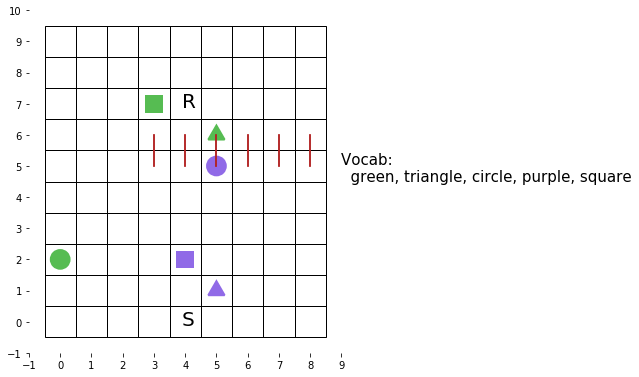

In [43]:
idxToViz = 3
visualizeExperimentTrial((9,10), recB_CommOptimal.loc[idxToViz]['signalerLocation'], 
                         recB_CommOptimal.loc[idxToViz]['receiverLocation'], 
                         recB_CommOptimal.loc[idxToViz]['signalSpace'],
                         recB_CommOptimal.loc[idxToViz]['targetDictionary'], 
                         barriers = [((3, 5), (0, 1)),
                                     ((4, 5), (0, 1)),
                                     ((5, 5), (0, 1)),
                                     ((6, 5), (0, 1)),
                                     ((7, 5), (0, 1)),
                                     ((8, 5), (0, 1)),
                                     ((3, 6), (0, -1)),
                                     ((4, 6), (0, -1)),
                                     ((5, 6), (0, -1)),
                                     ((6, 6), (0, -1)),
                                     ((7, 6), (0, -1)),
                                     ((8, 6), (0, -1))],
                         save=False, 
                         filename = './exptDemo.png')

In [44]:
recB_CommOptimal.loc[idxToViz]['intention']

'green triangle'

# Calculate Metrics

In [67]:
from visualizationsRE import getPercentFromOptimalUtilityDF, getProportionTargetReached

In [68]:
recB_targetReached = getProportionTargetReached(recB_CommOptimal)
sigB_targetReached = getProportionTargetReached(sigB_CommOptimal)

In [69]:
recB_targetReached

,signaler,receiver,quit,total,receiver failure,marginOfErrorS,marginOfErrorR,marginOfErrorQ,marginOfErrorRF,marginOfErrorT
IW_S1R0_sAchievesGoal,0.021898,0.839416,0.043796,0.861314,0.094891,0.024507,0.061480,0.034268,0.049075,0.057875
IW_S1R1_sAchievesGoal,0.029197,0.890511,0.051095,0.919708,0.029197,0.028192,0.052288,0.036872,0.028192,0.045505
IW_S1R2_sAchievesGoal,0.029197,0.890511,0.051095,0.919708,0.029197,0.028192,0.052288,0.036872,0.028192,0.045505
IW_S2R0_sAchievesGoal,0.000000,0.890511,0.007299,0.890511,0.102190,0.000000,0.052288,0.014254,0.050721,0.052288
IW_S2R1_sAchievesGoal,0.014599,0.963504,0.000000,0.978102,0.021898,0.020084,0.031401,0.000000,0.024507,0.024507
IW_S2R2_sAchievesGoal,0.000000,0.985401,0.007299,0.985401,0.007299,0.000000,0.020084,0.014254,0.014254,0.020084
RSA_S1R0_sAchievesGoal,0.102190,0.284672,0.474453,0.386861,0.138686,0.050721,0.075565,0.083618,0.057875,0.081555
RSA_S1R1_sAchievesGoal,0.116788,0.321168,0.430657,0.437956,0.131387,0.053781,0.078189,0.082918,0.056570,0.083080
RSA_S1R2_sAchievesGoal,0.109489,0.328467,0.474453,0.437956,0.087591,0.052288,0.078646,0.083618,0.047339,0.083080
RSA_S2R0_sAchievesGoal,0.087591,0.394161,0.313869,0.481752,0.204380,0.047339,0.081830,0.077709,0.067525,0.083671


In [70]:
sigB_targetReached

,signaler,receiver,quit,total,receiver failure,marginOfErrorS,marginOfErrorR,marginOfErrorQ,marginOfErrorRF,marginOfErrorT
IW_S1R0_sAchievesGoal,0.027778,0.722222,0.133333,0.750000,0.116667,0.024008,0.065434,0.049661,0.046898,0.063259
IW_S1R1_sAchievesGoal,0.038889,0.711111,0.161111,0.750000,0.088889,0.028244,0.066215,0.053707,0.041575,0.063259
IW_S1R2_sAchievesGoal,0.027778,0.772222,0.161111,0.800000,0.038889,0.024008,0.061270,0.053707,0.028244,0.058436
IW_S2R0_sAchievesGoal,0.005556,0.744444,0.022222,0.750000,0.227778,0.010859,0.063720,0.021534,0.061270,0.063259
IW_S2R1_sAchievesGoal,0.000000,0.911111,0.016667,0.911111,0.072222,0.000000,0.041575,0.018702,0.037816,0.041575
IW_S2R2_sAchievesGoal,0.011111,0.950000,0.005556,0.961111,0.033333,0.015313,0.031840,0.010859,0.026224,0.028244
RSA_S1R0_sAchievesGoal,0.150000,0.383333,0.377778,0.533333,0.088889,0.052164,0.071029,0.070829,0.041575,0.072882
RSA_S1R1_sAchievesGoal,0.122222,0.355556,0.394444,0.477778,0.127778,0.047851,0.069930,0.071399,0.048771,0.072973
RSA_S1R2_sAchievesGoal,0.111111,0.377778,0.411111,0.488889,0.100000,0.045912,0.070829,0.071881,0.043827,0.073027
RSA_S2R0_sAchievesGoal,0.105556,0.405556,0.300000,0.511111,0.188889,0.044889,0.071730,0.066947,0.057183,0.073027


In [71]:
meanUtilDiff_recB = getPercentFromOptimalUtilityDF(recB_CommOptimal).mean()
meanUtilDiff_recB

IW_S1R0_utility            79.278763
IW_S1R1_utility            88.965937
IW_S1R2_utility            88.126521
IW_S2R0_utility            80.604797
IW_S2R1_utility            88.442822
IW_S2R2_utility            98.357664
RSA_S1R0_utility           23.580118
RSA_S1R1_utility           28.050052
RSA_S1R2_utility           31.136601
RSA_S2R0_utility           24.157108
RSA_S2R1_utility           35.180744
RSA_S2R2_utility           44.499479
CentralControl_utility    100.000000
DIYSignaler_utility         5.048662
dtype: float64

In [72]:
meanUtilDiff_sigB = getPercentFromOptimalUtilityDF(sigB_CommOptimal).mean()
meanUtilDiff_sigB

IW_S1R0_utility            65.887204
IW_S1R1_utility            68.249534
IW_S1R2_utility            77.067039
IW_S2R0_utility            49.646182
IW_S2R1_utility            86.527002
IW_S2R2_utility            90.912477
RSA_S1R0_utility           36.491088
RSA_S1R1_utility           31.967279
RSA_S1R2_utility           35.094440
RSA_S2R0_utility           25.895185
RSA_S2R1_utility           43.165736
RSA_S2R2_utility           47.085661
CentralControl_utility    100.000000
DIYSignaler_utility         4.702048
dtype: float64

# Format Metrics

In [74]:
def formatUtilities(df, maxSignalerLevel, maxReceiverLevel):
    utilityArray = np.zeros((maxSignalerLevel, maxReceiverLevel+1))
    
    for signaler_row in range(1, maxSignalerLevel+1):
        for receiver_col in range(maxReceiverLevel+1):
            utilIndex = [ind for ind in df.index if 'S' + str(signaler_row) in ind and 'R' + str(receiver_col) in ind][0]
            utilityArray[maxSignalerLevel-signaler_row, receiver_col] = df.loc[utilIndex]
    return(utilityArray)

In [75]:
sigBarrierGrid_RSA = formatUtilities(df=meanUtilDiff_sigB.loc[['RSA_S1R0_utility', 'RSA_S1R1_utility', 'RSA_S1R2_utility','RSA_S2R0_utility', 'RSA_S2R1_utility', 'RSA_S2R2_utility']], maxSignalerLevel=2, maxReceiverLevel=2)
sigBarrierGrid_IW = formatUtilities(df=meanUtilDiff_sigB.loc[['IW_S1R0_utility', 'IW_S1R1_utility', 'IW_S1R2_utility','IW_S2R0_utility', 'IW_S2R1_utility', 'IW_S2R2_utility']], maxSignalerLevel=2, maxReceiverLevel=2)

recBarrierGrid_RSA = formatUtilities(df=meanUtilDiff_recB.loc[['RSA_S1R0_utility', 'RSA_S1R1_utility', 'RSA_S1R2_utility','RSA_S2R0_utility', 'RSA_S2R1_utility', 'RSA_S2R2_utility']], maxSignalerLevel=2, maxReceiverLevel=2)
recBarrierGrid_IW = formatUtilities(df=meanUtilDiff_recB.loc[['IW_S1R0_utility', 'IW_S1R1_utility', 'IW_S1R2_utility','IW_S2R0_utility', 'IW_S2R1_utility', 'IW_S2R2_utility']], maxSignalerLevel=2, maxReceiverLevel=2)

# Plot Metrics

## Util Diff - 190/300 Runs Level 2

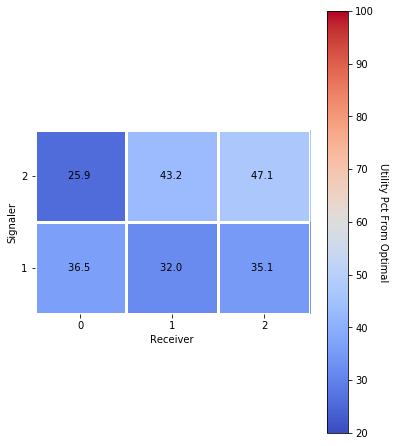

In [80]:
fig, ax = plt.subplots()

im, cbar = heatmap(sigBarrierGrid_RSA, [2,1], [0,1,2], ax=ax, cbarlabel="Utility Pct From Optimal")
texts = annotate_heatmap(im, valfmt="{x:.1f} ", threshold= 50)
fig.tight_layout()
#fig.savefig('./recursionUtil_RSA_sigBarrier.png',dpi=300, bbox_inches='tight')
plt.show()

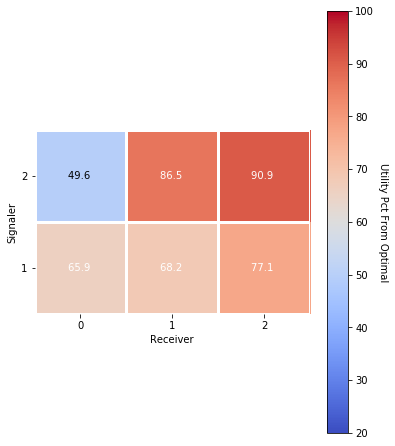

In [81]:
fig, ax = plt.subplots()

im, cbar = heatmap(sigBarrierGrid_IW, [2,1], [0,1,2], ax=ax, cbarlabel="Utility Pct From Optimal")
texts = annotate_heatmap(im, valfmt="{x:.1f} ", threshold= 50)
fig.tight_layout()
#fig.savefig('./recursionUtil_IW_sigBarrier.png',dpi=300, bbox_inches='tight')
plt.show()

## Util Diff - Barrier 2

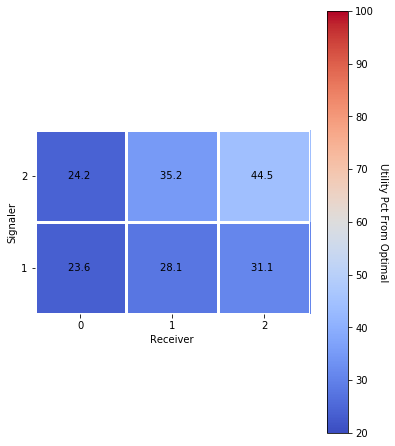

In [87]:
fig, ax = plt.subplots()

im, cbar = heatmap(recBarrierGrid_RSA, [2,1], [0,1,2], ax=ax, cbarlabel="Utility Pct From Optimal")
texts = annotate_heatmap(im, valfmt="{x:.1f} ", threshold= 50)
fig.tight_layout()
#fig.savefig('./recursionUtil_RSA_recBarrier.png',dpi=300, bbox_inches='tight')
plt.show()


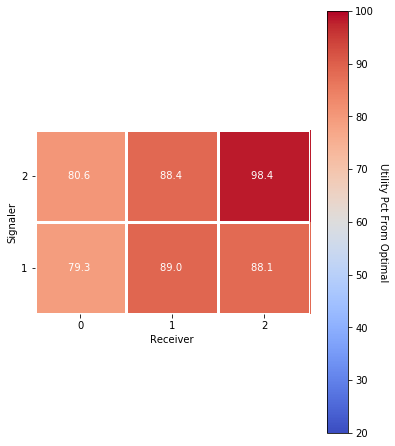

In [88]:
fig, ax = plt.subplots()

im, cbar = heatmap(recBarrierGrid_IW, [2,1], [0,1,2], ax=ax, cbarlabel="Utility Pct From Optimal")
texts = annotate_heatmap(im, valfmt="{x:.1f} ", threshold= 50)
fig.tight_layout()
#fig.savefig('./recursionUtil_IW_recBarrier.png',dpi=300, bbox_inches='tight')
plt.show()

## Total acc -190/300 Runs L2

In [ ]:
fig, ax = plt.subplots()

im, cbar = heatmap(rsaGrid_totalAcc, [2,1], [0,1,2], ax=ax, cbarlabel="Total Accuracy (Proportion)")
texts = annotate_heatmap(im, valfmt="{x:.2f} ", threshold= 50)
fig.tight_layout()
fig.savefig('./recursionTotalAcc_RSA_300Runs.png',dpi=300, bbox_inches='tight')
plt.show()



In [ ]:
fig, ax = plt.subplots()

im, cbar = heatmap(iwGrid_totalAcc, [2,1], [0,1,2], ax=ax, cbarlabel="Total Accuracy (Proportion)")
texts = annotate_heatmap(im, valfmt="{x:.2f} ", threshold= 50)
fig.tight_layout()
fig.savefig('./recursionTotalAcc_IW_300Runs.png',dpi=300, bbox_inches='tight')
plt.show()


## Successful Communication -190/300 Runs L2

In [ ]:
fig, ax = plt.subplots()

im, cbar = heatmap(rsaGrid_SuccessComm, [2,1], [0,1,2], ax=ax, cbarlabel="Successful Communication (Proportion)")
texts = annotate_heatmap(im, valfmt="{x:.2f} ", threshold= 50)
fig.tight_layout()
fig.savefig('./recursionCommSucc_RSA_300Runs.png',dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
fig, ax = plt.subplots()

im, cbar = heatmap(iwGrid_SuccessComm, [2,1], [0,1,2], ax=ax, cbarlabel="Successful Communication (Proportion)")
texts = annotate_heatmap(im, valfmt="{x:.2f} ", threshold= 50)
fig.tight_layout()
fig.savefig('./recursionCommSucc_IW_300Runs.png',dpi=300, bbox_inches='tight')
plt.show()